In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [33]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [34]:
df=pd.read_csv("AIML dataset.csv")

In [35]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


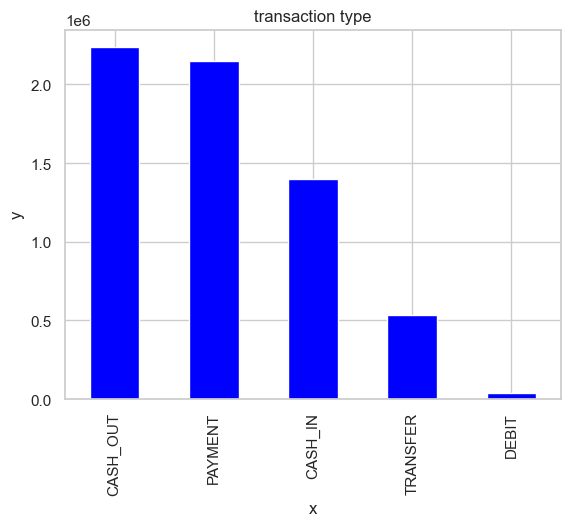

In [37]:
df["type"].value_counts().plot(kind="bar",title="transaction type",color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [38]:
df["amount"].value_counts()

amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
147631.41         1
239653.56         1
95994.69          1
373926.45         1
33313.71          1
Name: count, Length: 5316900, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


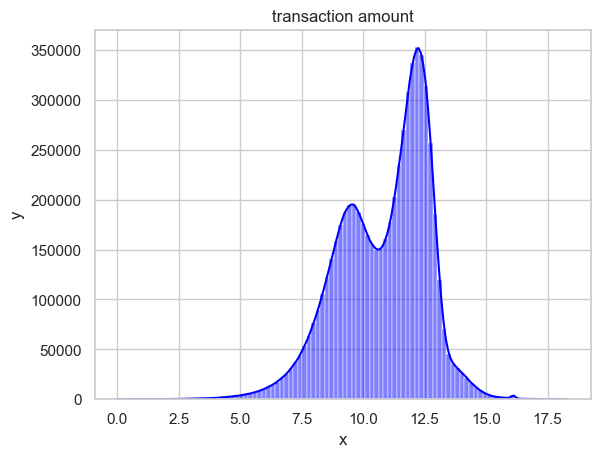

In [40]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="blue")
plt.title("transaction amount")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [41]:
df.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [42]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["oldbalanceDest"]-df["newbalanceDest"]

In [43]:
df.drop(columns="step",inplace=True)

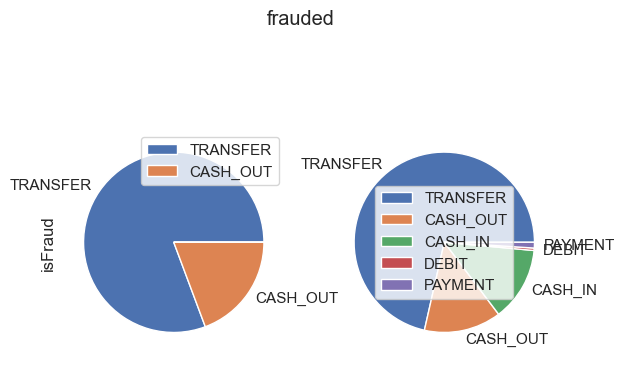

In [44]:
fraud_by_type=df.groupby("type")[["isFraud","amount"]].mean().sort_values(by="isFraud",ascending=False)
fraud_by_type.plot(kind="pie",subplots=True,title="frauded",color="blue")
plt.ylabel("")
plt.show()

In [45]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

In [46]:
top_senders=df["nameOrig"].value_counts().head(10)

In [47]:
top_receivers=df["nameDest"].value_counts().head(10)

In [48]:
fraud_user=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [49]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [50]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [51]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr

In [52]:
corr

<bound method DataFrame.corr of              amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           9839.64      170136.00       160296.36            0.00   
1           1864.28       21249.00        19384.72            0.00   
2            181.00         181.00            0.00            0.00   
3            181.00         181.00            0.00        21182.00   
4          11668.14       41554.00        29885.86            0.00   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  
0                  0.00        0  
1                  0.00        0  
2                  0.0

In [53]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0)&
    (df["newbalanceOrig"]>0)&
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
    ]

In [54]:
len(zero_after_transfer)

273753

In [55]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
58,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0,62610.80,-7866.29
70,CASH_OUT,47458.86,C527211736,209534.84,162075.98,C2096057945,52120.00,0.00,0,0,47458.86,52120.00
71,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.00,0.00,0,0,136872.93,217806.00
516,TRANSFER,7206.33,C478139423,24932.00,17725.67,C1032986144,21308.00,18161.79,0,0,7206.33,3146.21
665,CASH_OUT,227768.63,C1445424568,1011466.31,783697.68,C1023714065,530123.48,1412484.09,0,0,227768.63,-882360.61


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [57]:
df.head()


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [58]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)

In [59]:
df_model.head(
)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [60]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [61]:
y=df_model["isFraud"]
x=df_model.drop("isFraud",axis=1)

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)

In [64]:
preprocessor= ColumnTransformer(
    transformers=[
    ("num",StandardScaler(),numeric),
    ("cat",OneHotEncoder(drop="first"),categorical)
],
 remainder="drop"
)


In [67]:
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [68]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [69]:
y_pred=pipeline.predict(x_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [71]:
confusion_matrix(y_test,y_pred)

array([[1802442,  103880],
       [    139,    2325]])

In [72]:
pipeline.score(x_test,y_test)

0.9455051535373793

In [73]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']